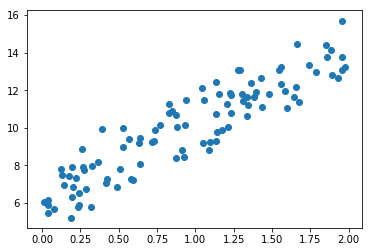

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [23]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [21]:
w0_update

array([[-0.1994937]])

In [20]:
N = len(y)
-(2/N)*0.01*diff

array([[-0.00184507],
       [-0.00252447],
       [-0.00225755],
       [-0.00176456],
       [-0.0021755 ],
       [-0.00261261],
       [-0.0021359 ],
       [-0.00259085],
       [-0.00252771],
       [-0.0020244 ],
       [-0.00238612],
       [-0.00229072],
       [-0.00215053],
       [-0.00287628],
       [-0.00138493],
       [-0.00148072],
       [-0.00123445],
       [-0.00288937],
       [-0.00247043],
       [-0.00267242],
       [-0.00314242],
       [-0.0022091 ],
       [-0.00168427],
       [-0.00264273],
       [-0.00115461],
       [-0.0026126 ],
       [-0.00134664],
       [-0.00256198],
       [-0.00241955],
       [-0.00215956],
       [-0.0019968 ],
       [-0.00261998],
       [-0.0017576 ],
       [-0.00249151],
       [-0.00117646],
       [-0.00234871],
       [-0.0023688 ],
       [-0.00215609],
       [-0.00283281],
       [-0.00247535],
       [-0.0018505 ],
       [-0.00167937],
       [-0.00237586],
       [-0.00156164],
       [-0.00212791],
       [-0

In [6]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

In [7]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [8]:

def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


In [10]:
w1

4.021813642697164

In [11]:
w0

array([[6.16203122]])

In [12]:
w0[0,0]

6.162031224717461